# Density and Contour Plots



A veces es útil mostrar datos tridimensionales en dos dimensiones utilizando contornos o regiones codificadas por colores. Hay tres funciones de Matplotlib que pueden ser útiles para esta tarea: ``plt.contour`` para gráficos de contorno, ``plt.contourf`` para gráficos de contorno rellenos y ``plt.imshow``para mostrar imágenes. En esta sección se analizan varios ejemplos del uso de estos. Comenzaremos configurando el notebook para trazar e importar las funciones que usaremos:

In [36]:
import matplotlib.pyplot as plt
import numpy as np

## Visualizing a Three-Dimensional Function

Comenzaremos demostrando un diagrama de contorno usando una función $z = f(x, y)$, usando la siguiente opción particular para $f$

In [37]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Se puede crear un gráfico de contorno con la función ``plt.contour``.
Toma tres argumentos: una cuadrícula de valores *x*, una cuadrícula de valores *y* y una cuadrícula de valores *z*.
Los valores *x* e *y* representan posiciones en el gráfico, y los valores *z* estarán representados por los niveles de contorno.
Quizás la forma más sencilla de preparar dichos datos es usar la función ``np.meshgrid``, que crea cuadrículas bidimensionales a partir de matrices unidimensionales:

In [38]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Ahora veamos esto con un gráfico de contorno estándar de solo línea:

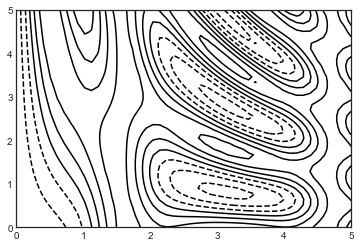

In [39]:
plt.contour(X, Y, Z, colors='black');

Tenga en cuenta que, de forma predeterminada, cuando se utiliza un solo color, los valores negativos se representan con líneas discontinuas y los valores positivos con líneas sólidas.
Alternativamente, las líneas se pueden codificar por colores especificando un mapa de colores con el argumento ``cmap``.
Aquí, también especificaremos que queremos que se dibujen más líneas: 20 intervalos igualmente espaciados dentro del rango de datos:

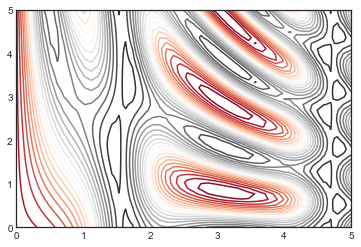

In [40]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Aquí elegimos el mapa de colores ``RdGy`` (abreviatura de *Red-Gray*), que es una buena opción para datos centrados.
Matplotlib tiene una amplia gama de mapas de colores disponibles, que puede explorar fácilmente en IPython completando una pestaña en el módulo ``plt.cm``:
```
plt.cm.<TAB>
```

Nuestra trama se ve mejor, pero los espacios entre líneas pueden distraer un poco.
Podemos cambiar esto cambiando a un gráfico de contorno lleno usando la función ``plt.contourf()`` (observe la ``f`` al final), que usa en gran medida la misma sintaxis que ``plt.contour() ``.

Además, agregaremos un comando ``plt.colorbar()``, que crea automáticamente un eje adicional con información de color etiquetada para el gráfico:

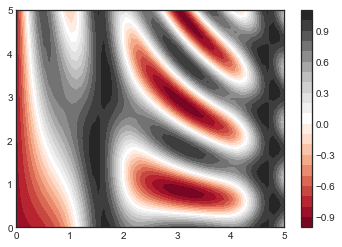

In [41]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

La barra de colores deja en claro que las regiones negras son "peaks", mientras que las regiones rojas son "valles".

Un problema potencial con esta trama es que es un poco "manchada". Es decir, los pasos de color son discretos en lugar de continuos, lo que no siempre es lo que se desea.
Esto podría remediarse estableciendo el número de contornos en un número muy alto, pero esto da como resultado una gráfica bastante ineficiente: Matplotlib debe generar un nuevo polígono para cada paso en el nivel.
Una mejor manera de manejar esto es usar la función ``plt.imshow()``, que interpreta una cuadrícula bidimensional de datos como una imagen.

El siguiente código muestra esto:

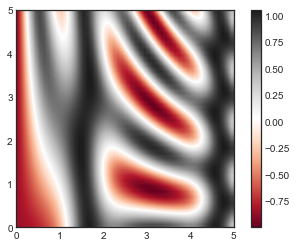

In [58]:
plt.imshow(Z, extent=[0, 5, 0, 5],origin='lower',
           cmap='RdGy',interpolation ='bilinear')
plt.colorbar();

Sin embargo, hay algunas trampas potenciales con ``imshow()``:

- ``plt.imshow()`` no acepta una cuadrícula *x* e *y*, por lo que debe especificar manualmente la *extensión* [*xmin*, *xmax*, *ymin*, *ymax*] de la imagen en la trama.
- ``plt.imshow()`` por defecto sigue la definición de matriz de imagen estándar donde el origen está en la parte superior izquierda, no en la parte inferior izquierda como en la mayoría de los gráficos de contorno. Esto debe cambiarse cuando se muestran datos cuadriculados.

Finalmente, a veces puede ser útil combinar gráficos de contorno y gráficos de imagen.
Por ejemplo, aquí usaremos una imagen de fondo parcialmente transparente (con la transparencia configurada a través del parámetro ``alpha``) y trazaremos los contornos con etiquetas en los mismos contornos (usando la función ``plt.clabel()``):

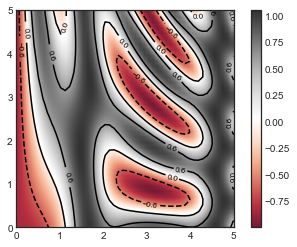

In [59]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.9,interpolation ='bilinear')
plt.colorbar();

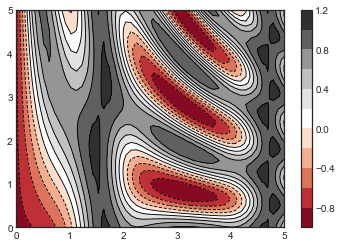

In [73]:
contours = plt.contour(X, Y, Z, 10, colors='black',linewidths=0.9)
#plt.clabel(contours, inline=True, fontsize=5)

plt.contourf(X, Y, Z, 10, cmap='RdGy')

plt.colorbar();

La combinación de estas tres funciones, ``plt.contour``, ``plt.contourf`` y ``plt.imshow``, brinda posibilidades casi ilimitadas para mostrar este tipo de datos tridimensionales dentro de un formato bidimensional. gráfico.